#Instalaciones

In [ ]:
!pip3 install python-igraph

     |████████████████████████████████| 378kB 9.7MB/s eta 0:00:01
  Created wheel for python-igraph: filename=python_igraph-0.7.1.post6-cp36-cp36m-linux_x86_64.whl size=2213831 sha256=76b1971c788297b9fed2e0c072fe63718a4ed79531c088ddd5ff22928c172904
  Stored in directory: /root/.cache/pip/wheels/41/d6/02/34eebae97e25f5b87d60f4c0687e00523e3f244fa41bc3f4a7
Successfully built python-igraph


#Zona para importaciones

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

from os import scandir, getcwd

import community
import itertools

import igraph as ig
import operator

import pandas as pd
import numpy as np



#Creacion de grafos

In [ ]:
G_google = nx.read_weighted_edgelist('/content/authors_titles_google.csv',delimiter=',')
G_facebook = nx.read_weighted_edgelist('/content/authors_titles_facebook.csv',delimiter=',') 
G_carnegi = nx.read_weighted_edgelist('/content/authors_titles_Massachusetts Institute of Technology.csv',delimiter=',')
G_mit = nx.read_weighted_edgelist('/content/authors_titles_Carnegie Mellon University.csv',delimiter=',')
G_illinois = nx.read_weighted_edgelist('/content/authors_titles_Univ. of Illinois at Urbana-Champaign.csv',delimiter=',')
G_microsoft = nx.read_weighted_edgelist('/content/authors_titles_microsoft.csv',delimiter=',')

# Definir funciones



In [ ]:
def ls(ruta = getcwd()):
    return [arch.name for arch in scandir(ruta) if arch.is_file()]

def load_networks(path):
    files = ls(path)
    graphs = {}
    full = nx.Graph()
    coauthors_full = set() 

    for file in files:
        name = file.split('_')[-1].split('.')[0]
        g = nx.read_weighted_edgelist(path+'/'+file, delimiter=',')        
        coauthors = set()
        full = nx.compose(full, g)
        with open(path+'/'+file) as f:
            lines = f.readlines()
            for line in lines:
                author = line.split(',')[0]
                coauthors.add(author)
                coauthors_full.add(author)
            g = g.subgraph(coauthors)            
        graphs[name] = g   
        
       
    '''
    for _, graph in graphs.items():
        for coauthor in graph.nodes():
            coauthors.add(coauthor) 
    
    full_filtred = full.subgraph(list(coauthors_full))
        
    graphs['Todas'] = full_filtred
    '''
    graphs['full']=full.subgraph(list(coauthors_full))
    return graphs


In [ ]:
def compare_comunity(comu,authors):
  total = len(comu)
  if total > 0:
    common = set(comu) & set(authors)
    return len(common) *100 /total 
  else:
    return 0


In [ ]:
def print_community(community,graphs):
  algorithms={}
  result={}
  result['google']=[]
  result['Massachusetts Institute of Technology']=[]
  result['microsoft']=[]
  result['facebook']=[]
  result['Carnegie Mellon University']=[]
  result['Univ']=[]
  compare={}  
  for i in range(len(community)):
    compare['google']=compare_comunity(community[i],graphs['google'].nodes())
    compare['Massachusetts Institute of Technology']=compare_comunity(community[i],graphs['Massachusetts Institute of Technology'].nodes())
    compare['microsoft']=compare_comunity(community[i],graphs['microsoft'].nodes())
    compare['facebook']=compare_comunity(community[i],graphs['facebook'].nodes())
    compare['Carnegie Mellon University']=compare_comunity(community[i],graphs['Carnegie Mellon University'].nodes())
    compare['Univ']=compare_comunity(community[i],graphs['Univ'].nodes())
    #print(compare)
    maximo=max(compare.items(), key=operator.itemgetter(1))[0]
    result[maximo].extend(community[i])

  for inst,authors in result.items():
    compar = compare_comunity(authors,graphs[inst].nodes())
    #print(compar,inst)
    algorithms[inst]=compar

  return algorithms

#Cargo grafos

In [ ]:
path ='/content/'
graphs = load_networks(path)
#print(graphs.keys())
#print(graphs['Univ'].nodes())
#/content/authors_titles_Univ. of Illinois at Urbana-Champaign.csv
graphs['full'].number_of_edges()

5524

# Extraigo comunidades

In [ ]:
largest_cc = max(nx.connected_components(graphs['full']), key=len)
g = graphs['full'].subgraph(largest_cc)
nx.write_gml(g, "/content/full.gml")

In [ ]:


k = 5
gn=[]
comp = nx.algorithms.community.centrality.girvan_newman(g)
print(comp)

for communities in itertools.islice(comp, k):
  gn.append(tuple(sorted(c) for c in communities))
  print("comu")
comunnities_gn={}
for index,authors in enumerate(gn[len(gn)-1]):
  comunnities_gn[index]=authors



<generator object girvan_newman at 0x7f79568ffd00>
comu
comu
comu
comu
comu


In [ ]:
algo={}

In [ ]:

algo['gn']=print_community(comunnities_gn,graphs)
#print(print_community(comunnities_gn,graphs))
print(algo)

TypeError: ignored

In [ ]:
louvain={}
part = community.best_partition(g,weight='weight',resolution=1)

val = set(part.values())
print(len(val))

for v in val:
  louvain[v]=[]

for key,values in part.items():
  louvain[values].append(key)

21


In [ ]:
#print(print_community(louvain,graphs))
algo['louvein']=print_community(louvain,graphs)
print(algo)

{'louvein': {'google': 63.08805790108565, 'Massachusetts Institute of Technology': 35.53719008264463, 'microsoft': 65.1105651105651, 'facebook': 49.23076923076923, 'Carnegie Mellon University': 51.21951219512195, 'Univ': 0}}


In [ ]:
for i in range(len(comunnities_gn)):
  compare={}  
  compare['google']=compare_comunity(comunnities_gn[i],graphs['google'].nodes())
  compare['Massachusetts Institute of Technology']=compare_comunity(comunnities_gn[i],graphs['Massachusetts Institute of Technology'].nodes())
  compare['microsoft']=compare_comunity(comunnities_gn[i],graphs['microsoft'].nodes())
  compare['facebook']=compare_comunity(comunnities_gn[i],graphs['facebook'].nodes())
  compare['Carnegie Mellon University']=compare_comunity(comunnities_gn[i],graphs['Carnegie Mellon University'].nodes())
  compare['Univ']=compare_comunity(comunnities_gn[i],graphs['Univ'].nodes())
print(compare)

{'google': 40.0, 'Massachusetts Institute of Technology': 0.0, 'microsoft': 60.0, 'facebook': 0.0, 'Carnegie Mellon University': 0.0, 'Univ': 0.0}


In [ ]:
nx.write_gml(g, "/content/full.gml")

In [ ]:
G = ig.read('/content/full.gml')
C = G.community_infomap(trials=100 ,edge_weights='weight')


usuarios_comm = [G.vs[c]['label'] for c in C]
print (len(usuarios_comm))

infomap={}

for index,com in enumerate(usuarios_comm):
  infomap[index]=com

print(infomap)

194
{0: ['Ben_Laurie', 'Tom_Bagby', 'Andrew_W._Senior', 'Rob_Clark', 'Benjamin_N._Lee', 'Quoc_V._Le', 'Zhifeng_Chen', 'Siyang_Qin', 'Hank_Liao', 'Daisy_Stanton', 'Yanping_Huang', 'Orhan_Firat', 'David_B._Kemp', 'Ruoming_Pang', 'Quan_Wang', 'Parisa_Haghani', 'Alex_Rudnick', 'Arnaud_Sahuguet', 'Mingxing_Tan', 'George_Foster', 'Oriol_Vinyals', 'Leif_Johnson', 'Golnaz_Ghiasi', 'Arvind_Neelakantan', 'Meire_Fortunato', 'Vincent_Wan', 'Fergus_Henderson', 'Akosua_Busia', 'Olivier_Siohan', 'Geoffrey_E._Hinton', 'Rohan_Anil', 'Austin_Waters', 'Chanwoo_Kim', 'Melvin_Johnson', 'Eric_Battenberg', 'William_Chan', 'Suyog_Gupta', 'Khe_Chai_Sim', 'Jonathan_Shen', 'Markus_Becker', 'Simon_Kornblith', 'Navdeep_Jaitly', 'Erik_McDermott', 'Ananya_Misra', 'Mohamed_G._Elfeky', 'Heiga_Zen', 'Yu_Zhang', 'Ying_Xiao', 'Kanishka_Rao', 'Rohit_Prabhavalkar'], 1: ['Donald_Brinkman', 'Ashish_Kapoor', 'Steven_M._Drucker', 'John_C._Tang', 'Neel_Joshi', 'Nathalie_Henry_Riche', 'Kori_Inkpen', 'Dravyansh_Sharma', 'Daniel_J

In [ ]:
algo['infomap']=print_community(infomap,graphs)
print(algo)

{'louvein': {'google': 63.08805790108565, 'Massachusetts Institute of Technology': 35.53719008264463, 'microsoft': 65.1105651105651, 'facebook': 49.23076923076923, 'Carnegie Mellon University': 51.21951219512195, 'Univ': 0}, 'infomap': {'google': 81.3157894736842, 'Massachusetts Institute of Technology': 59.21052631578947, 'microsoft': 80.33175355450237, 'facebook': 75.30864197530865, 'Carnegie Mellon University': 74.24242424242425, 'Univ': 59.45945945945946}}



#comparar deteccion

In [ ]:
algorithms={}

In [ ]:
def plot_line(algorithms):
  data={}
  orgs=['Google','MIT','Microsoft','Facebook','Carnegie','Illinois']
  plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
  for name,alg in algorithms.items():
    error=list(alg.values())
    data['x']=range(len(alg.keys()))
  #luveins_error=list(luveins.values())
  #gn_error=list(gn.values())
  #infomap_error=list(infomap.values())
    data[name]=error
  #print(data)
  df=pd.DataFrame(data)  
    #df=pd.DataFrame({'x':x,'luveins_error':luveins_error,'gn_error':gn_error,'infomap_error':infomap_error})
  #for key,value in algorithms:
  plt.plot( 'x', 'louvein', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', label="louvain",linewidth=4)
  plt.plot( 'x', 'gn', data=df, marker='v', color='green', linewidth=2,label="girvan newman")
  plt.plot( 'x', 'infomap', data=df, marker='s', color='red', linewidth=2, linestyle='dashed', label="infomap")
  plt.legend()
  plt.xticks(np.arange(len(orgs)),list(orgs),rotation='45')
  plt.title("Deteccion de comunidades")
  plt.ylabel("Aciertos %")

  plt.show()

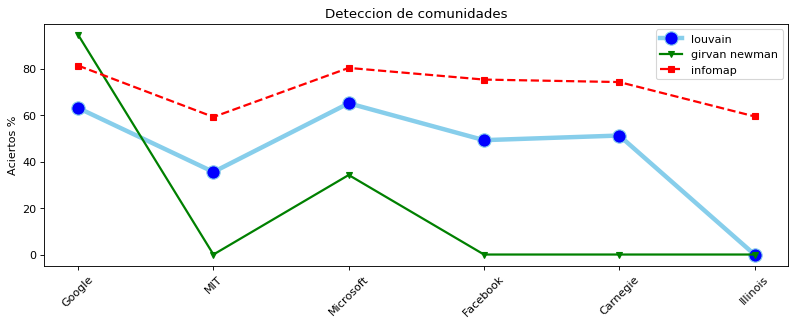

In [ ]:
plot_line(algo)

#Grafos dibujados

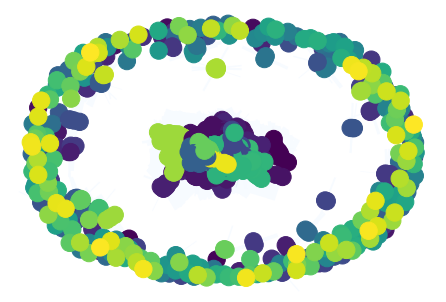

In [ ]:
com=(community.best_partition(graphs['full']))
colors = list(com.values())
nodes = list(com.keys())
edges,weights = zip(*nx.get_edge_attributes(graphs['full'],'weight').items())
pos = nx.spring_layout(graphs['full'])
#edges,weights = zip(*nx.get_edge_attributes(G_carnegi,'weight').items())
weights=[d*d for d in weights]
#community = parts.values
nx.draw(graphs['full'],pos=pos,nodelist=nodes,node_color=colors, edge_color=weights, width=50.0, edge_cmap=plt.cm.Blues)